In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
def computeCost(X, y, theta):
    inner = np.sum(np.power((X * theta.T) - y ,2)) / (2 * len(X))
    return inner

def gradientDescent(X, y, theta, alpha, iters):
    # initialize theta
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        loss = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(loss, X[:,j])
            temp[0,j] = theta[0, j] - (alpha / len(X) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [6]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [7]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


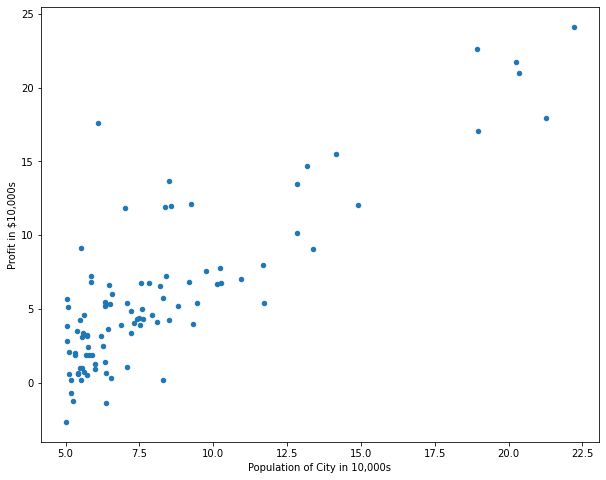

In [19]:
data.plot(kind='scatter', x='population', y='profit', figsize=(10,8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [186]:
cols = data.shape[1]
X = data.iloc[:,0:2]
y = data.iloc[:,2:3]
theta = np.array([0,0])

In [187]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(theta)

In [188]:
computeCost(X, y, theta)

32.072733877455676

In [189]:
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

In [190]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [191]:
computeCost(X, y, g)

4.515955503078914

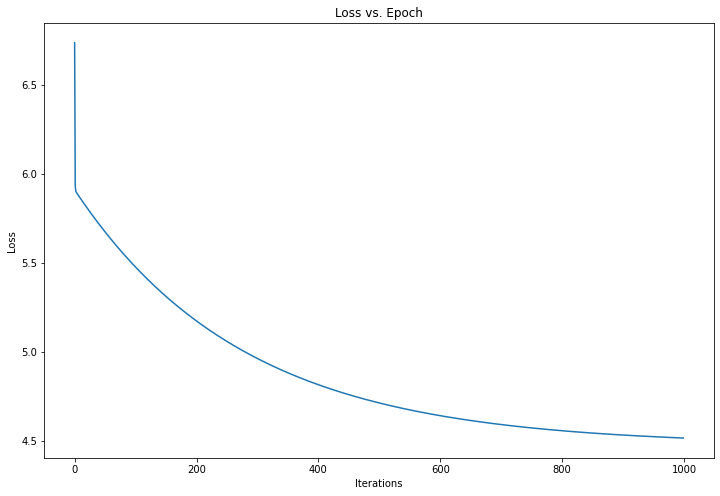

In [198]:
# cost function plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss vs. Epoch')
plt.show()

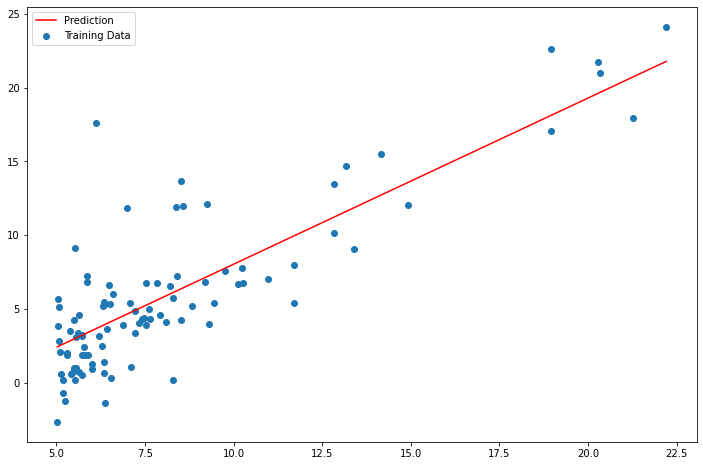

In [221]:
# fit plot
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Training Data')
ax.legend(loc=2)
plt.show()